In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
#converting MNIST Image Filesinto a tensor of 4 dimension (No. of images, height, width & color channel)

transform = transforms.ToTensor()

In [47]:
#train data
train_data = datasets.MNIST(root = '/cnn_data_mnist',train=True, download=True,transform=transform)

In [48]:
#test_data
test_data = datasets.MNIST(root = '/cnn_data_mnist',train=False, download=True,transform=transform)

In [49]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data_mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [50]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data_mnist
    Split: Test
    StandardTransform
Transform: ToTensor()

In [51]:
pwd

'/content'

In [52]:
#creating a small batch size
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)

test_loader = DataLoader(test_data,batch_size=10,shuffle=False)


In [53]:
#defining CNN Model
conv1= nn.Conv2d(1, 6, 3, 1) #input size, no of filters, kernal size(3x3), stride
conv2= nn.Conv2d(6, 16, 3, 1)

In [54]:
#grab 1 MNIST Record

for i , (X_Train, y_train) in enumerate(train_data):
  break

In [55]:
X_Train.shape

torch.Size([1, 28, 28])

In [56]:
x = X_Train.view(1,1,28,28) #batch size, no. of images, image size(28x28)

In [57]:
#performing our first conv
x = f.relu(conv1(x)) #rectifies linear unit for our activation funcion

In [58]:
x

tensor([[[[0.1284, 0.1284, 0.1284,  ..., 0.1284, 0.1284, 0.1284],
          [0.1284, 0.1284, 0.1284,  ..., 0.1284, 0.1284, 0.1284],
          [0.1284, 0.1284, 0.1284,  ..., 0.1284, 0.1284, 0.1284],
          ...,
          [0.1284, 0.1284, 0.2404,  ..., 0.1284, 0.1284, 0.1284],
          [0.1284, 0.1284, 0.2438,  ..., 0.1284, 0.1284, 0.1284],
          [0.1284, 0.1284, 0.1284,  ..., 0.1284, 0.1284, 0.1284]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3272, 0.3272, 0.3272,  ..., 0.3272, 0.3272, 0.3272],
          [0.3272, 0.3272, 0.3272,  ..., 0.3272, 0.3272, 0.3272],
          [0.3272, 0.3272, 0.3272,  ..., 0

In [59]:
x.shape

torch.Size([1, 6, 26, 26])

In [60]:
#passing theough the pooling layer
x = f.max_pool2d(x,2,2) #kernal=2, stride=2

In [61]:
x.shape

torch.Size([1, 6, 13, 13])

In [62]:
#doing our 2nd conv
x = f.relu(conv2(x))

In [63]:
x.shape

torch.Size([1, 16, 11, 11])

In [64]:
#pooling
x = f.max_pool2d(x,2,2)

In [65]:
x.shape

torch.Size([1, 16, 5, 5])

In [66]:
#defining model
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()

    #Convolutional Layers
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    #fully connected layers
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  #Forward Propagation
  def forward(self,X):
    X = f.relu(self.conv1(X))
    X = f.max_pool2d(X,2,2) #2x2 kernal, stride=2

    #second Pass
    X = f.relu(self.conv2(X))
    X = f.max_pool2d(X,2,2) #2x2 kernal, stride=2

    #Re-view to flatten it out
    X = X.view(-1,16*5*5) #-1 so that we can vary the batch size

    #Fully Connected Layers
    X = f.relu(self.fc1(X))
    X = f.relu(self.fc2(X))
    X = self.fc3(X)

    return f.log_softmax(X, dim=1)

In [67]:
#creating an instance of model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [68]:
#Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001) #smaller the learning rate, longers it will take training

In [69]:
#training the model
import time
start_time = time.time()

#Create Variable to track things.
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For loop for epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0



  #Train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1 #starts our batches at 1
    y_pred = model(X_train) #get the predicted values from the training set (it is not flattened)
    loss = criterion(y_pred,y_train) #comparing the predictions to the correct answers in y_train

    predicted = torch.max(y_pred.data,1)[1] #add up no of correct predictions. Indexed of first item
    batch_corr = (predicted==y_train).sum() #how many we got correct from this specific batch. True = 1, False=0
    trn_corr += batch_corr #keep track as we go along training

    #Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print out Some Results
    if b%600 ==0:
      print(f'Epoch: {i} batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  #Test
  with torch.no_grad(): #no gradient, so we dont update our weight and biases with the test data
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1] #adding up correct predictions
      tst_corr += (predicted == y_test).sum() #T=1, F=0 sum

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total_time = current_time-start_time
print(f'Training took: {total_time/60} min.')

Epoch: 0 batch: 600 Loss: 0.1623610556125641
Epoch: 0 batch: 1200 Loss: 0.1502392590045929
Epoch: 0 batch: 1800 Loss: 0.4744560718536377
Epoch: 0 batch: 2400 Loss: 0.14238706231117249
Epoch: 0 batch: 3000 Loss: 0.007758188061416149
Epoch: 0 batch: 3600 Loss: 0.3836284875869751
Epoch: 0 batch: 4200 Loss: 0.0038223876617848873
Epoch: 0 batch: 4800 Loss: 0.0021286322735249996
Epoch: 0 batch: 5400 Loss: 0.0569545142352581
Epoch: 0 batch: 6000 Loss: 0.00038789428072050214
Epoch: 1 batch: 600 Loss: 0.005851339548826218
Epoch: 1 batch: 1200 Loss: 0.3855525553226471
Epoch: 1 batch: 1800 Loss: 0.004819948226213455
Epoch: 1 batch: 2400 Loss: 0.003216963727027178
Epoch: 1 batch: 3000 Loss: 0.0332382395863533
Epoch: 1 batch: 3600 Loss: 0.5372857451438904
Epoch: 1 batch: 4200 Loss: 0.04561494290828705
Epoch: 1 batch: 4800 Loss: 0.0007510822033509612
Epoch: 1 batch: 5400 Loss: 0.0001173773780465126
Epoch: 1 batch: 6000 Loss: 0.14201366901397705
Epoch: 2 batch: 600 Loss: 0.023733172565698624
Epoch: 2

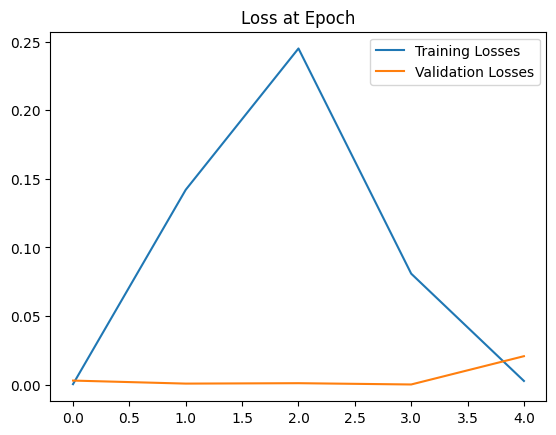

In [70]:
#Graph the loss at each epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Losses')
plt.plot(test_losses, label='Validation Losses')
plt.title('Loss at Epoch')
plt.legend()

Text(0.5, 1.0, 'Accuracy at the end of each epoch ')

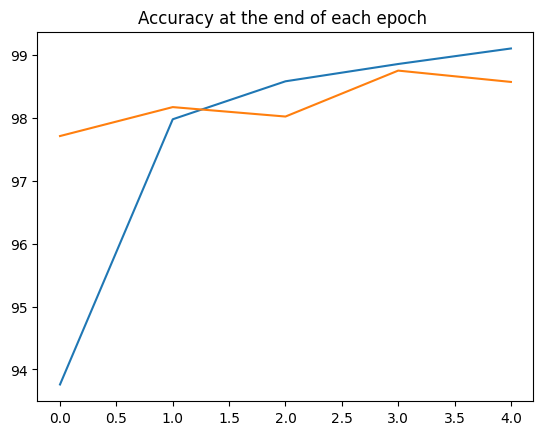

In [71]:
#graph the accuracy at the and of each epoch
plt.plot([t/600 for t in train_correct],label = 'training Accuracy')
plt.plot([t/100 for t in test_correct],label='Validation Accuracy')
plt.title('Accuracy at the end of each epoch ')

In [72]:
test_load_every = DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
  correct=0
  for X_test,y_test in test_load_every:
    y_val = model(X_test)
    predicted = torch.max(y_val,1)[1]
    correct+=(predicted==y_test).sum()

In [73]:
#test correct
correct.item()

9857

In [74]:
#% correct
correct.item()/len(y_test)

0.9857

In [75]:
#grab an image
test_data[4143] #tensor with an image in it.... at ed, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [76]:
#grab just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [77]:
#reshaping it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

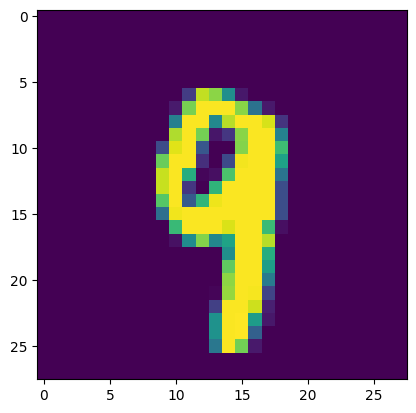

In [78]:
#Showing the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [79]:
#passing an image through the model
model.eval()
with torch.no_grad():
  new_predictions = model(test_data[1978][0].view(1,1,28,28)) #batch_size of 1, 1 color channel, 28x28 size

In [80]:
#check the new pred (in for of probabilities)
new_predictions

tensor([[-2.4992e+01, -1.8860e+01, -2.4744e+01, -3.0158e+01, -4.7684e-07,
         -2.1318e+01, -2.2632e+01, -2.0485e+01, -2.1817e+01, -1.4484e+01]])

In [81]:
new_predictions.argmax()

tensor(4)

In [82]:
  import torch
  import torchvision
  import torchvision.transforms as transforms

In [83]:
  import torch
  import torchvision
  import torchvision.transforms as transforms

train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download=True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set,batch_size=10)

In [84]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=10)